# Merge All Data to Prepare for Analysis

## Purpose: Merge the following data in preparation for analysis
* "Base" (Daily Google Mobility + COVID-19) 
* "VDE" (Locality Voter Preferences in 2020)
* "NOAA" (Daily Precipitation)
* "Census" (Locality 2019 Population Estimates)

## Dependencies

In [2]:
import pandas as pd
import missingno as msno 

## For Multiple Outputs 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
## Google Mobility & COVID-19 (daily)
base = pd.read_csv("data/build/build1_base.csv")

base.head()

,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths,country_region_code,country_region,sub_region_1,...,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-03-17,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,NaN,NaN,51001.0,2020-03-17,-8.0,11.0,NaN,NaN,-15.0,5.0
1,2020-03-17,51003,Albemarle,Thomas Jefferson,0,0,0,US,United States,Virginia,...,NaN,NaN,51003.0,2020-03-17,-22.0,9.0,NaN,-16.0,-38.0,14.0
2,2020-03-17,51005,Alleghany,Alleghany,0,0,0,US,United States,Virginia,...,NaN,NaN,51005.0,2020-03-17,-11.0,NaN,NaN,8.0,-12.0,NaN
3,2020-03-17,51007,Amelia,Piedmont,0,0,0,US,United States,Virginia,...,NaN,NaN,51007.0,2020-03-17,-21.0,6.0,NaN,NaN,-18.0,NaN
4,2020-03-17,51009,Amherst,Central Virginia,0,0,0,US,United States,Virginia,...,NaN,NaN,51009.0,2020-03-17,3.0,22.0,NaN,NaN,-13.0,6.0


In [4]:
## VDE - Voter Preferences in 2020 Election (county)
vde = pd.read_csv("data/build/build2_locality.csv")

vde.head()

,Locality,P_Democrat,P_Republican,S_Democrat,S_Republican
0,ACCOMACK COUNTY,0,1,0,1
1,ALBEMARLE COUNTY,1,0,1,0
2,ALEXANDRIA CITY,1,0,1,0
3,ALLEGHANY COUNTY,0,1,0,1
4,AMELIA COUNTY,0,1,0,1


In [5]:
## NOAA - Precipitation (daily)
noaa = pd.read_csv("data/build/build3_precipitation.csv")

noaa.head()

,COUNTY,FIPS,DATE,PRCP
0,Amelia County,51007,2020-03-17,0.000
1,Amelia County,51007,2020-03-18,0.000
2,Amelia County,51007,2020-03-19,0.095
3,Amelia County,51007,2020-03-20,0.000
4,Amelia County,51007,2020-03-21,0.145


In [6]:
## Census - Estimated 2019 population & 2018 5-year estimates of income (county)
census = pd.read_csv('data/build/build4_census.csv')

census.head()

,FIPS,2019,DP03_0062E,DP03_0063E
0,51001,"32,316",43210,57996
1,51003,"109,330",75394,107948
2,51005,"14,860",47794,60513
3,51007,"13,145",58526,74185
4,51009,"31,605",49170,61676


In [7]:
## Standardize VDE "LOCALITY"
vde['LOCALITY'] = vde['Locality'].str.replace(" COUNTY", "")
vde['LOCALITY'] = vde['LOCALITY'].str.replace('&', 'AND')

vde.head()

,Locality,P_Democrat,P_Republican,S_Democrat,S_Republican,LOCALITY
0,ACCOMACK COUNTY,0,1,0,1,ACCOMACK
1,ALBEMARLE COUNTY,1,0,1,0,ALBEMARLE
2,ALEXANDRIA CITY,1,0,1,0,ALEXANDRIA CITY
3,ALLEGHANY COUNTY,0,1,0,1,ALLEGHANY
4,AMELIA COUNTY,0,1,0,1,AMELIA


In [8]:
vde1 = vde[['LOCALITY','P_Democrat','P_Republican','S_Democrat','S_Republican']]

In [9]:
## Standardize Base "LOCALITY"

base["LOCALITY"] = base["Locality"].str.upper()

## [NOTE - CONSIDER CONVERTING THIS TO FUNCTION]
base.loc[base['LOCALITY'] == 'ALEXANDRIA', 'LOCALITY'] = 'ALEXANDRIA CITY'
base.loc[base['LOCALITY'] == 'BRISTOL', 'LOCALITY'] = 'BRISTOL CITY'
base.loc[base['LOCALITY'] == 'CHARLOTTESVILLE', 'LOCALITY'] = 'CHARLOTTESVILLE CITY'
base.loc[base['LOCALITY'] == 'CHESAPEAKE', 'LOCALITY'] = 'CHESAPEAKE CITY'
base.loc[base['LOCALITY'] == 'COLONIAL HEIGHTS', 'LOCALITY'] = 'COLONIAL HEIGHTS CITY'
base.loc[base['LOCALITY'] == 'COVINGTON', 'LOCALITY'] = 'COVINGTON CITY'
base.loc[base['LOCALITY'] == 'DANVILLE', 'LOCALITY'] = 'DANVILLE CITY'
base.loc[base['LOCALITY'] == 'EMPORIA', 'LOCALITY'] = 'EMPORIA CITY'
base.loc[base['LOCALITY'] == 'FAIRFAX', 'LOCALITY'] = 'FAIRFAX CITY'
base.loc[base['LOCALITY'] == 'FALLS CHURCH', 'LOCALITY'] = 'FALLS CHURCH CITY'
base.loc[base['LOCALITY'] == 'FRANKLIN', 'LOCALITY'] = 'FRANKLIN CITY'
base.loc[base['LOCALITY'] == 'FREDERICKSBURG', 'LOCALITY'] = 'FREDERICKSBURG CITY'
base.loc[base['LOCALITY'] == 'GALAX', 'LOCALITY'] = 'GALAX CITY'
base.loc[base['LOCALITY'] == 'HAMPTON', 'LOCALITY'] = 'HAMPTON CITY'
base.loc[base['LOCALITY'] == 'HARRISONBURG', 'LOCALITY'] = 'HARRISONBURG CITY'
base.loc[base['LOCALITY'] == 'HOPEWELL', 'LOCALITY'] = 'HOPEWELL CITY'
base.loc[base['LOCALITY'] == 'LEXINGTON', 'LOCALITY'] = 'LEXINGTON CITY'
base.loc[base['LOCALITY'] == 'LYNCHBURG', 'LOCALITY'] = 'LYNCHBURG CITY'
base.loc[base['LOCALITY'] == 'MANASSAS PARK', 'LOCALITY'] = 'MANASSAS PARK CITY'
base.loc[base['LOCALITY'] == 'MARTINSVILLE', 'LOCALITY'] = 'MARTINSVILLE CITY'
base.loc[base['LOCALITY'] == 'NEWPORT NEWS', 'LOCALITY'] = 'NEWPORT NEWS CITY'
base.loc[base['LOCALITY'] == 'NORFOLK', 'LOCALITY'] = 'NORFOLK CITY'
base.loc[base['LOCALITY'] == 'NORTON', 'LOCALITY'] = 'NORTON CITY'
base.loc[base['LOCALITY'] == 'PETERSBURG', 'LOCALITY'] = 'PETERSBURG CITY'
base.loc[base['LOCALITY'] == 'POQUOSON', 'LOCALITY'] = 'POQUOSON CITY'
base.loc[base['LOCALITY'] == 'PORTSMOUTH', 'LOCALITY'] = 'PORTSMOUTH CITY'
base.loc[base['LOCALITY'] == 'RADFORD', 'LOCALITY'] = 'RADFORD CITY'
base.loc[base['LOCALITY'] == 'RICHMOND', 'LOCALITY'] = 'RICHMOND CITY'
base.loc[base['LOCALITY'] == 'ROANOKE', 'LOCALITY'] = 'ROANOKE CITY'
base.loc[base['LOCALITY'] == 'SALEM', 'LOCALITY'] = 'SALEM CITY'
base.loc[base['LOCALITY'] == 'STAUNTON', 'LOCALITY'] = 'STAUNTON CITY'
base.loc[base['LOCALITY'] == 'SUFFOLK', 'LOCALITY'] = 'SUFFOLK CITY'
base.loc[base['LOCALITY'] == 'VIRGINIA BEACH', 'LOCALITY'] = 'VIRGINIA BEACH CITY'
base.loc[base['LOCALITY'] == 'WAYNESBORO', 'LOCALITY'] = 'WAYNESBORO CITY'
base.loc[base['LOCALITY'] == 'WILLIAMSBURG', 'LOCALITY'] = 'WILLIAMSBURG CITY'
base.loc[base['LOCALITY'] == 'WINCHESTER', 'LOCALITY'] = 'WINCHESTER CITY'

base.head()

,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths,country_region_code,country_region,sub_region_1,...,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,LOCALITY
0,2020-03-17,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,NaN,51001.0,2020-03-17,-8.0,11.0,NaN,NaN,-15.0,5.0,ACCOMACK
1,2020-03-17,51003,Albemarle,Thomas Jefferson,0,0,0,US,United States,Virginia,...,NaN,51003.0,2020-03-17,-22.0,9.0,NaN,-16.0,-38.0,14.0,ALBEMARLE
2,2020-03-17,51005,Alleghany,Alleghany,0,0,0,US,United States,Virginia,...,NaN,51005.0,2020-03-17,-11.0,NaN,NaN,8.0,-12.0,NaN,ALLEGHANY
3,2020-03-17,51007,Amelia,Piedmont,0,0,0,US,United States,Virginia,...,NaN,51007.0,2020-03-17,-21.0,6.0,NaN,NaN,-18.0,NaN,AMELIA
4,2020-03-17,51009,Amherst,Central Virginia,0,0,0,US,United States,Virginia,...,NaN,51009.0,2020-03-17,3.0,22.0,NaN,NaN,-13.0,6.0,AMHERST


In [10]:
## Pre-Merge dimensions
base.shape

## Inner Merge
base1 = base.merge(vde1, how= "inner", on= "LOCALITY")

## Post-merge dimensions (Should be identical row count)
base1.shape

base1.head()

(33649, 22)

(33649, 26)

,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths,country_region_code,country_region,sub_region_1,...,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,LOCALITY,P_Democrat,P_Republican,S_Democrat,S_Republican
0,2020-03-17,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,11.0,NaN,NaN,-15.0,5.0,ACCOMACK,0,1,0,1
1,2020-03-18,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,9.0,NaN,NaN,-17.0,8.0,ACCOMACK,0,1,0,1
2,2020-03-19,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,8.0,NaN,NaN,-18.0,8.0,ACCOMACK,0,1,0,1
3,2020-03-20,51001,Accomack,Eastern Shore,1,0,0,US,United States,Virginia,...,3.0,NaN,NaN,-17.0,10.0,ACCOMACK,0,1,0,1
4,2020-03-21,51001,Accomack,Eastern Shore,1,0,0,US,United States,Virginia,...,9.0,NaN,NaN,4.0,NaN,ACCOMACK,0,1,0,1


In [11]:
## Standardize date
base1['DATE'] = pd.to_datetime(base1['Report Date'])

min(base1['DATE'])
max(base1['DATE'])

Timestamp('2020-03-17 00:00:00')

Timestamp('2020-11-24 00:00:00')

In [12]:
## Standardize date
noaa['DATE'] = pd.to_datetime(noaa['DATE'])

min(noaa['DATE'])
max(noaa['DATE'])

Timestamp('2020-03-17 00:00:00')

Timestamp('2020-11-23 00:00:00')

In [13]:
## Pre-Merge dimensions
base1.shape

## Inner Merge
base2 = base1.merge(noaa, how= "left", on= ['DATE','FIPS'])

## Post-merge dimensions (Should be identical row count)
base2.shape

base2.head()

(33649, 27)

(33649, 29)

,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths,country_region_code,country_region,sub_region_1,...,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,LOCALITY,P_Democrat,P_Republican,S_Democrat,S_Republican,DATE,COUNTY,PRCP
0,2020-03-17,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,-15.0,5.0,ACCOMACK,0,1,0,1,2020-03-17,NaN,NaN
1,2020-03-18,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,-17.0,8.0,ACCOMACK,0,1,0,1,2020-03-18,NaN,NaN
2,2020-03-19,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,-18.0,8.0,ACCOMACK,0,1,0,1,2020-03-19,NaN,NaN
3,2020-03-20,51001,Accomack,Eastern Shore,1,0,0,US,United States,Virginia,...,-17.0,10.0,ACCOMACK,0,1,0,1,2020-03-20,NaN,NaN
4,2020-03-21,51001,Accomack,Eastern Shore,1,0,0,US,United States,Virginia,...,4.0,NaN,ACCOMACK,0,1,0,1,2020-03-21,NaN,NaN


<AxesSubplot:>

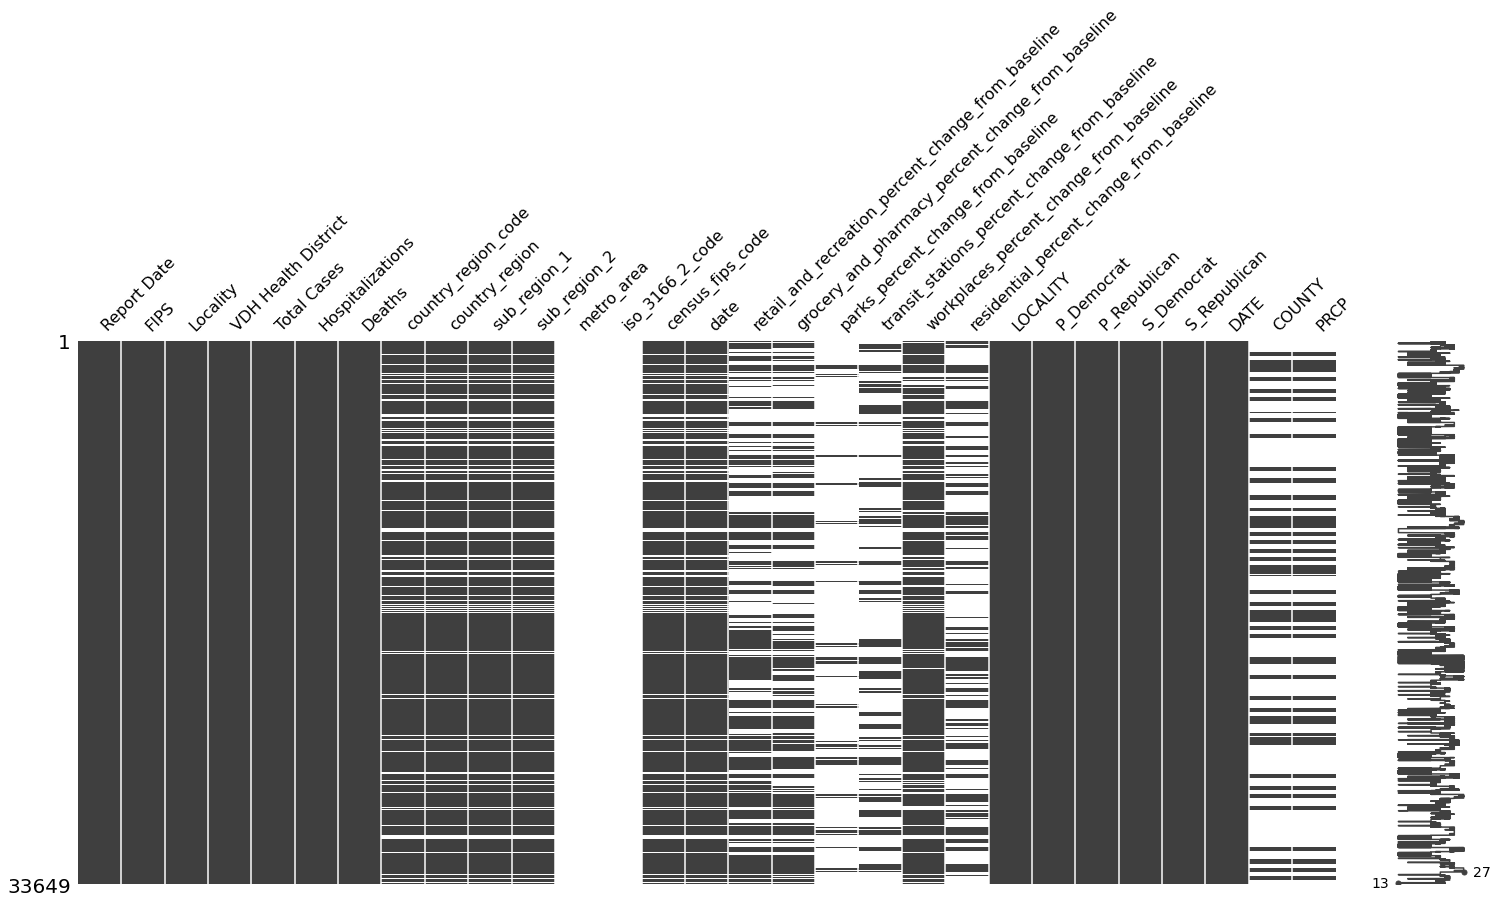

In [14]:
## Visualize missing data - Only 50/133 counties had daily precipitation data from NOAA
msno.matrix(base2)

In [15]:
## Pre-Merge dimensions
base2.shape

## Inner Merge
base3 = base2.merge(census, how= "inner", on= 'FIPS')

## Post-merge dimensions (Should be identical row count)
base3.shape

base3.head()

(33649, 29)

(33649, 32)

,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths,country_region_code,country_region,sub_region_1,...,P_Democrat,P_Republican,S_Democrat,S_Republican,DATE,COUNTY,PRCP,2019,DP03_0062E,DP03_0063E
0,2020-03-17,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,0,1,0,1,2020-03-17,NaN,NaN,"32,316",43210,57996
1,2020-03-18,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,0,1,0,1,2020-03-18,NaN,NaN,"32,316",43210,57996
2,2020-03-19,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,0,1,0,1,2020-03-19,NaN,NaN,"32,316",43210,57996
3,2020-03-20,51001,Accomack,Eastern Shore,1,0,0,US,United States,Virginia,...,0,1,0,1,2020-03-20,NaN,NaN,"32,316",43210,57996
4,2020-03-21,51001,Accomack,Eastern Shore,1,0,0,US,United States,Virginia,...,0,1,0,1,2020-03-21,NaN,NaN,"32,316",43210,57996


In [16]:
base3 = base3.sort_values(by= ['FIPS','DATE'])

In [17]:
## Lag Total Cases per day per locality
base3['lag_case'] = base3.groupby('FIPS')['Total Cases'].shift(1)

## Calculate daily delta of cases
base3['delta_case0'] = base3['Total Cases'] - base3['lag_case']
base3['delta_case1'] = base3.groupby('FIPS')['delta_case0'].shift(1)
base3['delta_case2'] = base3.groupby('FIPS')['delta_case1'].shift(1)
base3['delta_case3'] = base3.groupby('FIPS')['delta_case2'].shift(1)
base3['delta_case4'] = base3.groupby('FIPS')['delta_case3'].shift(1)
base3['delta_case5'] = base3.groupby('FIPS')['delta_case4'].shift(1)
base3['delta_case6'] = base3.groupby('FIPS')['delta_case5'].shift(1)

## Sum delta0-6 for weekly delta
# base3['weekly_delta_cases'] = base3.iloc[:, -7:-1].sum(axis=1)
base3['weekly_delta_cases'] = (base3['delta_case0'] +
                                  base3['delta_case1'] + 
                                  base3['delta_case2'] +
                                  base3['delta_case3'] + 
                                  base3['delta_case4'] +
                                  base3['delta_case5'] + 
                                  base3['delta_case6'])
## Check some values
base3

,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths,country_region_code,country_region,sub_region_1,...,DP03_0063E,lag_case,delta_case0,delta_case1,delta_case2,delta_case3,delta_case4,delta_case5,delta_case6,weekly_delta_cases
0,2020-03-17,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,57996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-18,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,57996,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-19,51001,Accomack,Eastern Shore,0,0,0,US,United States,Virginia,...,57996,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-20,51001,Accomack,Eastern Shore,1,0,0,US,United States,Virginia,...,57996,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-03-21,51001,Accomack,Eastern Shore,1,0,0,US,United States,Virginia,...,57996,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33644,2020-11-20,51840,Winchester,Lord Fairfax,847,50,4,US,United States,Virginia,...,75613,832.0,15.0,14.0,29.0,17.0,3.0,5.0,19.0,102.0
33645,2020-11-21,51840,Winchester,Lord Fairfax,855,51,4,US,United States,Virginia,...,75613,847.0,8.0,15.0,14.0,29.0,17.0,3.0,5.0,91.0
33646,2020-11-22,51840,Winchester,Lord Fairfax,863,51,4,US,United States,Virginia,...,75613,855.0,8.0,8.0,15.0,14.0,29.0,17.0,3.0,94.0
33647,2020-11-23,51840,Winchester,Lord Fairfax,890,52,4,US,United States,Virginia,...,75613,863.0,27.0,8.0,8.0,15.0,14.0,29.0,17.0,118.0


In [18]:
## Flags for Phase 1-3
# source: https://www.cbs19news.com/story/42987299/total-number-of-covid19-cases-reaches-240063-in-virginia

## Refine this for county specific details
base3['phase_1'] = base3['DATE'].apply(lambda x: pd.Timestamp(2020,5,13) <= x < pd.Timestamp(2020,6,5), 1, 0)
base3['phase_2'] = base3['DATE'].apply(lambda x: pd.Timestamp(2020,6,5) <= x < pd.Timestamp(2020,7,1), 1, 0)
base3['phase_3'] = base3['DATE'].apply(lambda x: pd.Timestamp(2020,7,1) <= x, 1, 0)

In [21]:
## Convert Population to Numeric

base3['Pop_2019'] = pd.to_numeric(base3['2019'].str.replace(",",""))

base3['Pop_2019'].dtype

dtype('int64')

In [22]:
base3.to_csv('data/build/build5_analysis_data.csv', index= False)